# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Data loading and pre-processing

In [2]:
data = pd.read_csv('multiple_linear_regression.csv')

In [3]:
data.head(3)

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [4]:
data.shape

(200, 4)

In [5]:
data.isna().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

# Splitting Data into Training and Rest  

Input Data

In [6]:
x = data.iloc[:, 0:-1] # selecting Features 1, 2, and 3, that are inputs

In [7]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


Output Data

In [8]:
y = data.loc[:,'Target']

In [9]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Target, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

# take 70% of data in training set and 30% in the test data, randomizing selections

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 41)

In [11]:
x_train.shape

(140, 3)

In [12]:
x_test.shape

(60, 3)

# Multiple Linear Regression

Training the Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linear_regressor = LinearRegression() # initializing the linear_regression_model

In [15]:
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [16]:
b1, b2, b3 = linear_regressor.coef_

In [17]:
b0 = linear_regressor.intercept_

In [18]:
print('y = ' , b0, ' + ', b1, ' *x1 ', ' + ', b2,' *x2 ', ' + ', b3, ' *x3 ')

y =  2.63831520706146  +  0.04590350529967576  *x1   +  0.19736170458296343  *x2   +  -0.001359842968329861  *x3 


Predicting TEST OUTPUT

In [19]:
predicted_value = linear_regressor.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
cost = mean_squared_error(y_test, predicted_value)

In [22]:
cost

3.158974734146932

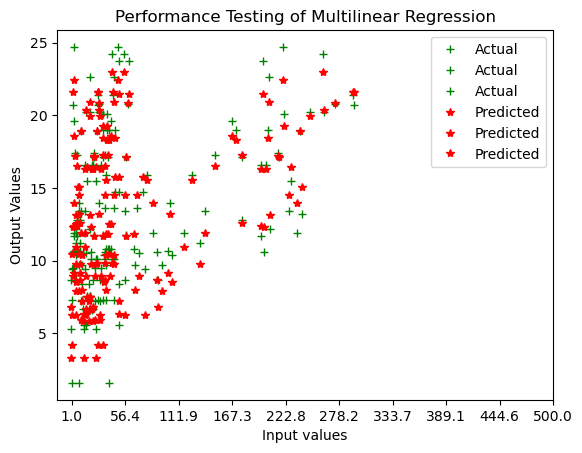

In [23]:
plt.plot(x_test, y_test, '+', color = 'green', label = 'Actual') # plotting actual test inputs and outputs

plt.plot(x_test, predicted_value, '*', color = 'red', label = 'Predicted') # plotting predicted test input and predicted output
plt.xlabel('Input values')
plt.ylabel('Output Values')
plt.xticks(np.linspace(1, 500, 10)) # setting x-axis to be labelled in 50s
plt.legend()
plt.title('Performance Testing of Multilinear Regression')
plt.show()


# Multiple-Linear_Regression using Ordinary_Least_Squares Method

In [24]:
import statsmodels.api as sm


In [25]:
x_with_constant = sm.add_constant(x_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
186,1.0,139.5,2.1,26.6
56,1.0,7.3,28.1,41.4
87,1.0,110.7,40.6,63.2
177,1.0,170.2,7.8,35.2
181,1.0,218.5,5.4,27.4
...,...,...,...,...
65,1.0,69.0,9.3,0.9
80,1.0,76.4,26.7,22.3
140,1.0,73.4,17.0,12.9
163,1.0,163.5,36.8,7.4


In [26]:
model = sm.OLS(y_train, x_with_constant) # run the OLS with y_train and x_with_constant

In [27]:
result = model.fit() # fit the model with OLS and get the parameters into 'result'

In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     405.5
Date:                Tue, 28 May 2024   Prob (F-statistic):           1.29e-67
Time:                        18:37:39   Log-Likelihood:                -267.07
No. Observations:                 140   AIC:                             542.1
Df Residuals:                     136   BIC:                             553.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6383      0.378      6.982      0.000       1.891       3.386
Feature 1      0.0459      0.002     27.735      0.000       0.043       0.049
Feature 2      0.1974      0.010     19.028      0.000       0.177       0.218
Feature 3     -0.0014      0.007     -0.196      0.845      -0.015       0.012
==============================================================================
Omnibus:                       14.540   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.234
Skew:                          -0.828   Prob(JB):                     0.000298
Kurtosis:                       3.201   Cond. No.                         481.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# from above, T-test's p-value (for the Feature-3) is very high, implying that the 'Feature 3' is not a good parameter
# for prediction and its removal is warranted

In [30]:
x_train_new = x_train

In [31]:
del x_train_new['Feature 3']

In [32]:
x_with_constant = sm.add_constant(x_train_new)

In [33]:
new_model = sm.OLS(y_train, x_with_constant)

In [34]:
new_result = new_model.fit()

In [35]:
new_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     612.5
Date:                Tue, 28 May 2024   Prob (F-statistic):           4.70e-69
Time:                        18:37:39   Log-Likelihood:                -267.09
No. Observations:                 140   AIC:                             540.2
Df Residuals:                     137   BIC:                             549.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6175      0.361      7.242      0.000       1.903       3.332
Feature 1      0.0459      0.002     27.849      0.000       0.043       0.049
Feature 2      0.1965      0.009     21.028      0.000       0.178       0.215
==============================================================================
Omnibus:                       14.717   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.437
Skew:                          -0.832   Prob(JB):                     0.000270
Kurtosis:                       3.221   Cond. No.                         455.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Now we predict using new_model

In [40]:
new_x_test = sm.add_constant(x_test)

In [41]:
del new_x_test['Feature 3']
new_x_test

,const,Feature 1,Feature 2
96,1.0,197.6,3.5
63,1.0,102.7,29.6
168,1.0,215.4,23.6
196,1.0,94.2,4.9
68,1.0,237.4,27.5
9,1.0,199.8,2.6
152,1.0,197.6,23.3
91,1.0,28.6,1.5
51,1.0,100.4,9.6
172,1.0,19.6,20.1


In [44]:
new_predicted_value = new_result.predict(new_x_test)

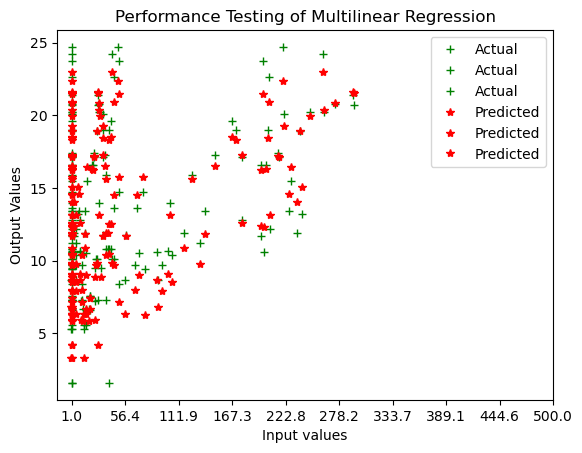

In [45]:
plt.plot(new_x_test, y_test, '+', color = 'green', label = 'Actual') # plotting actual test inputs and outputs

plt.plot(new_x_test, new_predicted_value, '*', color = 'red', label = 'Predicted') # plotting predicted test input and predicted output
plt.xlabel('Input values')
plt.ylabel('Output Values')
plt.xticks(np.linspace(1, 500, 10)) # setting x-axis to be labelled in 50s
plt.legend()
plt.title('Performance Testing of Multilinear Regression')
plt.show()